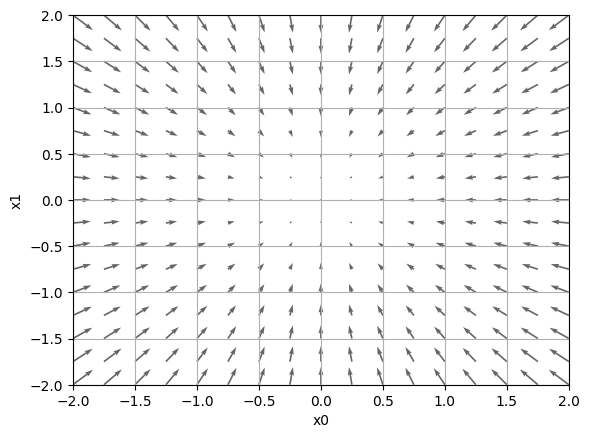

In [1]:
%run ./sample_programs/gradient_2d.py

## 4.4


In [2]:
import numpy as np

def function_2(x):
    return x[0]**2 + x[1]**2

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad


In [3]:
# [3.0, 4.0]のとき
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [4]:
# [0.0, 2.0]のとき
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [5]:
# [3.0, 0.0]のとき
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

#### 学習率0.01のとき
init_x：初期値，lr：学習率，step_num：更新回数

In [6]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [7]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

#### 学習率10.0 と大きいとき

In [8]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

# 発散してしまう！

array([-2.58983747e+13, -1.29524862e+12])

#### 学習率が1e-10と小さいとき

In [9]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

# 全然更新されない！

array([-2.99999994,  3.99999992])

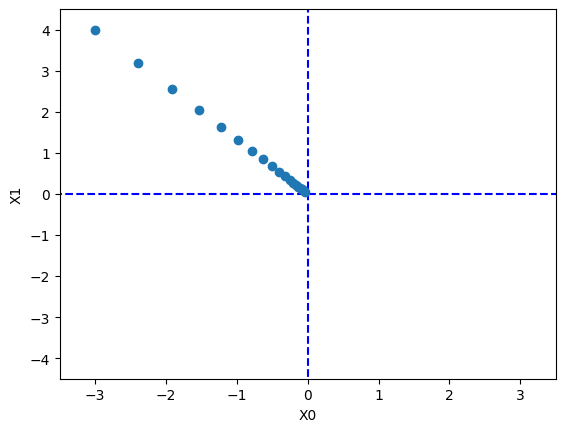

In [10]:
%run ./sample_programs/gradient_method.py

#### ニューラルネットワークの勾配

In [11]:
from function04 import SimpleNet as simpleNet
net = simpleNet()

print(net.W)


[[-0.69289227  1.11542869  0.03859316]
 [-0.80474592 -0.25620771  0.87069252]]


In [12]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.14000669  0.43867028  0.80677916]


In [13]:
t = np.array([0, 0, 1]) # 正解ラベル
net.loss(x, t)

0.6069210884652624

In [14]:
def f(W): # Wはダミー
    return net.loss(x, t)
dW = numerical_gradient(f, net.W) # loss関数をwで微分＝勾配
print(dW)

[[ 0.04667564  0.22630855 -0.27298418]
 [ 0.07001346  0.33946282 -0.40947628]]


In [15]:
f = lambda W: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.04667564  0.22630855 -0.27298418]
 [ 0.07001346  0.33946282 -0.40947628]]


各ｗにおいて，  
w>0：h増やすと損失関数もwh分増える → マイナス方向に更新するべき  
w<0：h増やすと損失関数がwh分減る → プラス方向に更新するべき

## 4.5

In [16]:
from function04 import TwoLayerNet

net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)


(784, 100)
(100,)
(100, 10)
(10,)


In [17]:
x = np.random.rand(100, 784)
y = net.predict(x)
print(y.shape)

(100, 10)


In [18]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


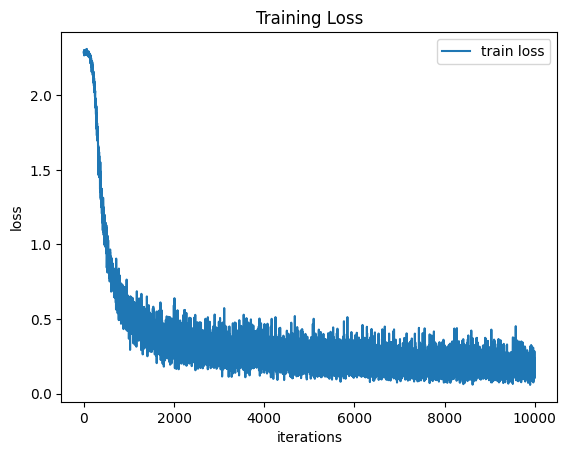

In [19]:
%run ./function04/train_neuralnet.py

train acc, test acc | 0.11135, 0.1116
train acc, test acc | 0.7831, 0.7867
train acc, test acc | 0.87525, 0.8792
train acc, test acc | 0.8978833333333334, 0.9001
train acc, test acc | 0.90815, 0.9102
train acc, test acc | 0.9138166666666667, 0.9185
train acc, test acc | 0.9198, 0.923
train acc, test acc | 0.9238166666666666, 0.9255
train acc, test acc | 0.9266333333333333, 0.9288
train acc, test acc | 0.9307166666666666, 0.9333
train acc, test acc | 0.93385, 0.935
train acc, test acc | 0.9367166666666666, 0.9367
train acc, test acc | 0.9386833333333333, 0.9386
train acc, test acc | 0.9410666666666667, 0.9408
train acc, test acc | 0.94355, 0.9431
train acc, test acc | 0.94515, 0.9445
train acc, test acc | 0.9464666666666667, 0.9458


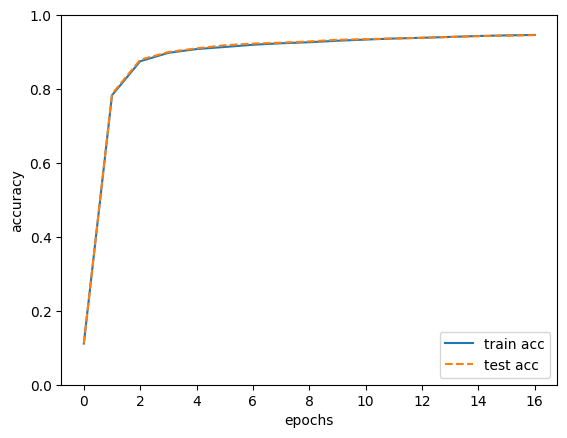

In [3]:
# = lr = 0.1
%run ./function04/train_neuralnet_epoch.py

train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.19063333333333332, 0.1898
train acc, test acc | 0.11268333333333333, 0.1143
train acc, test acc | 0.34415, 0.3507
train acc, test acc | 0.4872166666666667, 0.4916
train acc, test acc | 0.54975, 0.5543
train acc, test acc | 0.61585, 0.6238
train acc, test acc | 0.67835, 0.6841
train acc, test acc | 0.73765, 0.7439
train acc, test acc | 0.7728, 0.7775
train acc, test acc | 0.7947833333333333, 0.8006
train acc, test acc | 0.8134333333333333, 0.8189
train acc, test acc | 0.8280166666666666, 0.8307
train acc, test acc | 0.8379666666666666, 0.843
train acc, test acc | 0.8471166666666666, 0.8514
train acc, test acc | 0.8558833333333333, 0.8595
train acc, test acc | 0.8627833333333333, 0.866


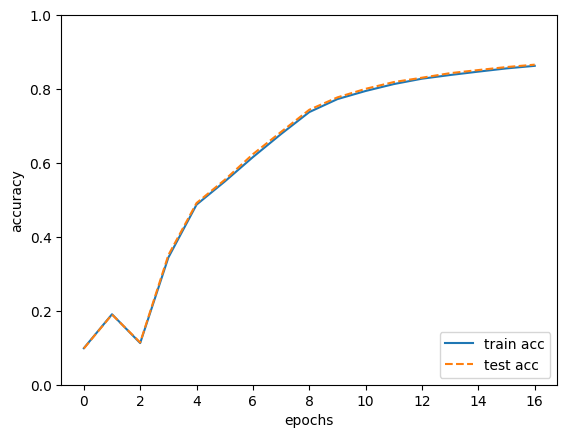

In [ ]:
# lr = 0.01
%run ./function04/train_neuralnet_epoch.py

train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11238333333333334, 0.1135


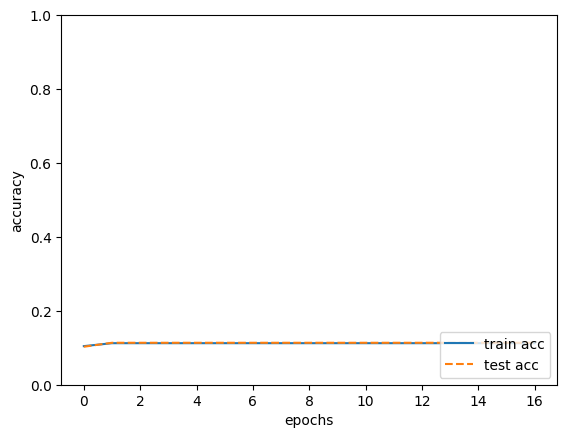

In [4]:
# lr = 0.001
%run ./function04/train_neuralnet_epoch.py

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.9319166666666666, 0.9305
train acc, test acc | 0.9474166666666667, 0.944
train acc, test acc | 0.9572166666666667, 0.9529
train acc, test acc | 0.9638833333333333, 0.9567
train acc, test acc | 0.9690666666666666, 0.9619
train acc, test acc | 0.9712666666666666, 0.9637
train acc, test acc | 0.9752833333333333, 0.9674
train acc, test acc | 0.97705, 0.9669
train acc, test acc | 0.9776, 0.9686
train acc, test acc | 0.9798166666666667, 0.9698
train acc, test acc | 0.9822166666666666, 0.9689
train acc, test acc | 0.9835, 0.969
train acc, test acc | 0.9852333333333333, 0.9716
train acc, test acc | 0.98515, 0.9705
train acc, test acc | 0.9870833333333333, 0.97
train acc, test acc | 0.9877166666666667, 0.9716


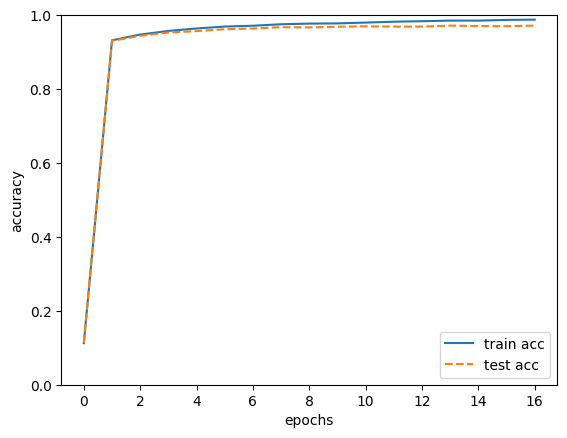

In [5]:
lr = 1.0
%run ./function04/train_neuralnet_epoch.py

- learning_rate = 0.1
    - 最適
- learning_rate = 0.01
    - 学習しきれていない（更新が遅すぎる）
- learning_rate = 0.001
    - 学習が全くできていない（更新が全くできていない）
- learning_rate = 1.0
    - 精度としては訓練でもテストでも一番高いが，過学習が起きている

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.8033833333333333, 0.8101
train acc, test acc | 0.8809, 0.8869
train acc, test acc | 0.9006833333333333, 0.904
train acc, test acc | 0.9085333333333333, 0.9122
train acc, test acc | 0.9147666666666666, 0.9168
train acc, test acc | 0.9187666666666666, 0.9195
train acc, test acc | 0.92255, 0.9239
train acc, test acc | 0.9265166666666667, 0.9301
train acc, test acc | 0.9291, 0.931
train acc, test acc | 0.9329333333333333, 0.9319
train acc, test acc | 0.9355833333333333, 0.9365
train acc, test acc | 0.9389666666666666, 0.9374
train acc, test acc | 0.94075, 0.9394
train acc, test acc | 0.94255, 0.9408
train acc, test acc | 0.9447166666666666, 0.9432
train acc, test acc | 0.9465, 0.9463


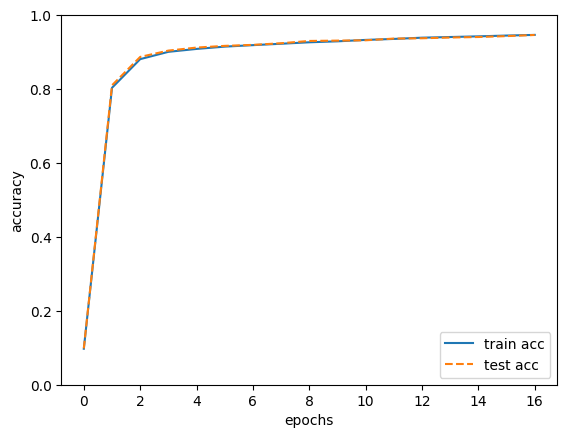

In [6]:
# hidden_size = 100
%run ./function04/train_neuralnet_epoch.py

train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.82315, 0.8296
train acc, test acc | 0.8881, 0.8929
train acc, test acc | 0.9003833333333333, 0.904
train acc, test acc | 0.9056333333333333, 0.9093
train acc, test acc | 0.9085333333333333, 0.913
train acc, test acc | 0.9142333333333333, 0.9159
train acc, test acc | 0.91525, 0.916
train acc, test acc | 0.9169166666666667, 0.9198
train acc, test acc | 0.9206333333333333, 0.9214
train acc, test acc | 0.9215166666666667, 0.9205
train acc, test acc | 0.92135, 0.9229
train acc, test acc | 0.9262666666666667, 0.9241
train acc, test acc | 0.9252833333333333, 0.9235
train acc, test acc | 0.9287833333333333, 0.9271
train acc, test acc | 0.93065, 0.9303
train acc, test acc | 0.9317166666666666, 0.9299


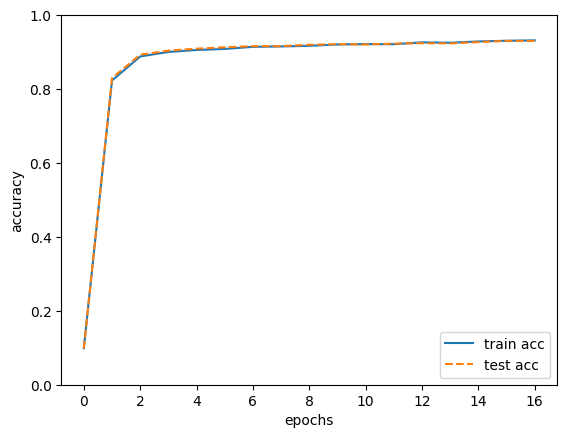

In [7]:
# hidden_size = 500
%run ./function04/train_neuralnet_epoch.py